In [ ]:
!pip install umap-learn > /dev/null

# **Project Pipeline**

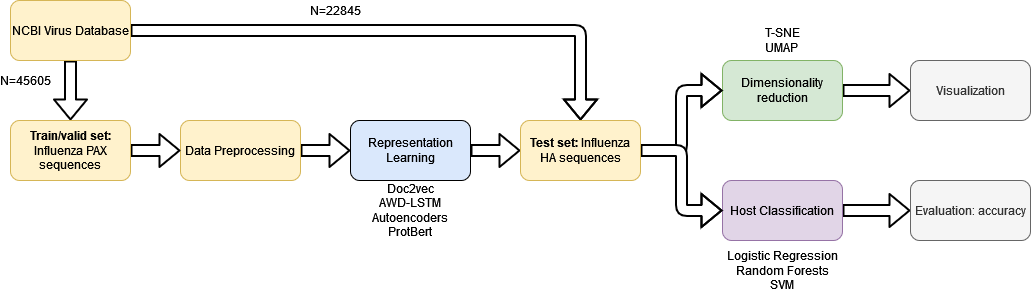

In this notebook, we are going to be using Doc2vec to extract viral protein embeddings, that we later visualize them by applying dimensionalilty reduction, or use them to determine the predicted host for the influenza A virus



In [ ]:

import umap
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = Path('/content/drive/MyDrive/PFE/')

We ilustrate the inference process of Doc2vec as following :

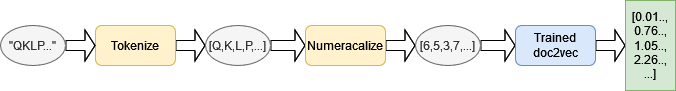

In [ ]:
df = pd.read_csv(path/'data/prot_sequences_pax_3.csv')
df_test = pd.read_csv(path/'data/prot_sequences_influenza_ha_3_species.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# df['sequences'] = df['sequences'].apply(lambda x: ' '.join(x))

In [ ]:
def read_corpus(sequences, tokens_only=False):
  for i, line in enumerate(sequences):
    tokens = list(line)
        # For training data, add tags
    if tokens_only:
      yield tokens
    else:
      yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(df['sequences']))
test_corpus = list(read_corpus(df_test['sequences'], tokens_only=True))

In [ ]:
train_corpus[:2]

[TaggedDocument(words=['M', 'E', 'D', 'F', 'V', 'R', 'Q', 'C', 'F', 'N', 'P', 'M', 'I', 'V', 'E', 'L', 'A', 'E', 'K', 'A', 'M', 'K', 'E', 'Y', 'G', 'E', 'D', 'P', 'K', 'I', 'E', 'T', 'N', 'K', 'F', 'A', 'A', 'I', 'C', 'T', 'H', 'L', 'E', 'V', 'C', 'F', 'M', 'Y', 'S', 'D', 'F', 'H', 'F', 'I', 'D', 'E', 'R', 'G', 'E', 'S', 'I', 'I', 'V', 'E', 'S', 'G', 'D', 'P', 'N', 'A', 'L', 'L', 'K', 'H', 'R', 'F', 'E', 'I', 'I', 'E', 'G', 'R', 'D', 'R', 'T', 'M', 'A', 'W', 'T', 'V', 'V', 'N', 'S', 'I', 'C', 'N', 'T', 'T', 'G', 'V', 'D', 'K', 'P', 'K', 'F', 'L', 'P', 'D', 'L', 'Y', 'D', 'Y', 'K', 'E', 'N', 'R', 'F', 'I', 'E', 'I', 'G', 'V', 'T', 'R', 'R', 'E', 'V', 'H', 'I', 'Y', 'Y', 'L', 'E', 'K', 'A', 'N', 'K', 'I', 'K', 'S', 'E', 'K', 'T', 'H', 'I', 'H', 'I', 'F', 'S', 'F', 'T', 'G', 'E', 'E', 'M', 'A', 'T', 'K', 'A', 'D', 'Y', 'T', 'L', 'D', 'E', 'E', 'S', 'R', 'A', 'R', 'I', 'K', 'T', 'R', 'L', 'F', 'T', 'I', 'R', 'Q', 'E', 'M', 'A', 'S', 'R', 'G', 'L', 'W', 'D', 'S', 'F', 'V', 'N', 'P', 'R', 'E

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=400, min_count=0, epochs=100)

In [ ]:
model.build_vocab(train_corpus)

In [ ]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
#model.wv['A']

In [ ]:
vecs = []
for w in test_corpus:
  vecs.append(model.infer_vector(w))

In [ ]:
np.save(path/"embeddings/doc2vec_embeds.npy", vecs)
# vecs = np.load(path/"embeddings/doc2vec_embeds.npy")

In [ ]:
vecs.shape

(22845, 50)

After training the model on the corpus using the optimized Gensim library, we use the obtained trained model to infer a vector for each amino acid of the protein sequences by passing the list of tokens to the model:in f er vector function. Then we applied dimensionality reduction methods to visualize the high-dimensional representations 

# **Dimentionality Reduction**


We assessed the information captured by the embeddings extracted from the viral protein sequences using Doc2vec by projecting the high dimensional representations in two dimensional space (2D), using TSNE and UMAP. Toward this end, we choose to visualize the influenza A
protein representations according to three major hosts (Human, Swine, Avian).

# 1- TSNE Projection

In [ ]:
embeds = TSNE(n_components=2, n_iter=3000).fit_transform(vecs)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


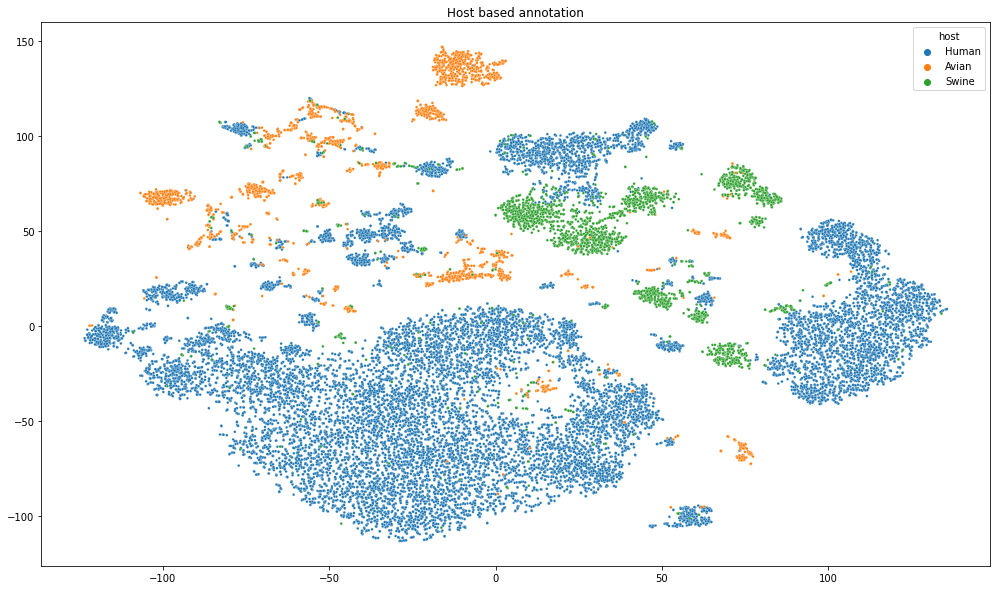

In [ ]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.set_title('Host based annotation')
sns.scatterplot(embeds[:,0], embeds[:, 1], hue=df_test['host'], s=7)

In [ ]:
df_test['date'] = df_test['date'].fillna(1900)
df_test['date'] = pd.to_datetime(df_test['date'])

dat = (df_test['date'].dt.year/10).apply(lambda x: int(x))
mon = (df_test['date'].dt.month)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


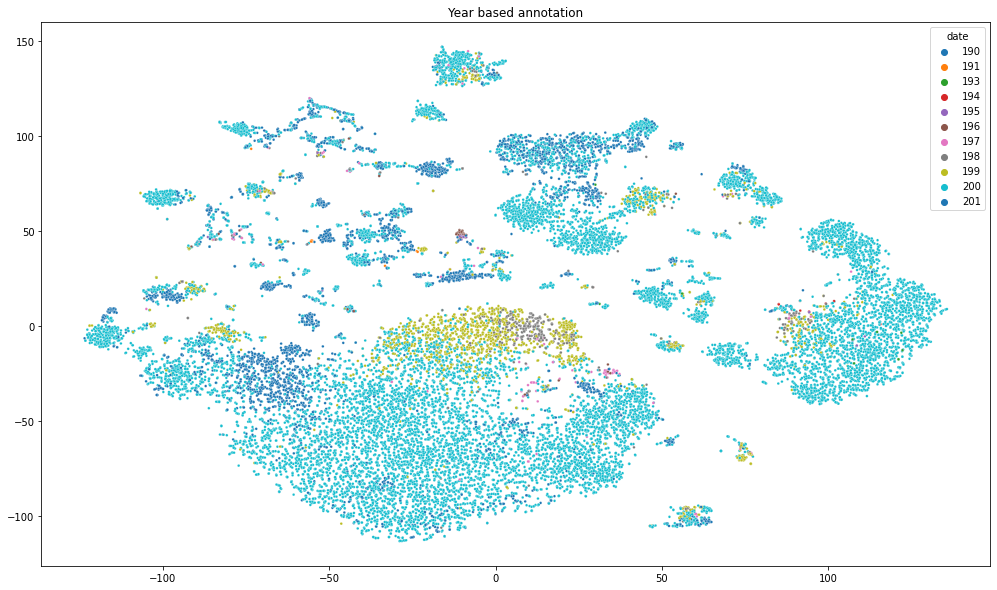

In [ ]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.set_title('Year based annotation')
sns.scatterplot(embeds[:, 0], embeds[:, 1], hue=dat, s=7, palette='tab10')

# 2- UMAP Projection

In [ ]:
reducer = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.5, random_state=42)

In [ ]:
umap_embeds_2d = reducer.fit_transform(vecs)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


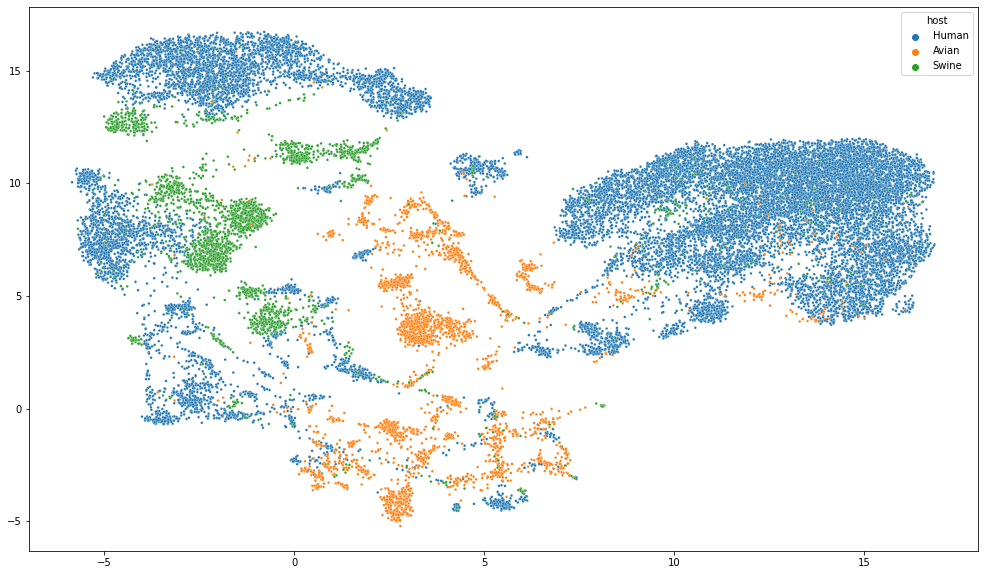

In [ ]:
fig, ax = plt.subplots(figsize=(17, 10))
sns.scatterplot(umap_embeds_2d[:, 0], umap_embeds_2d[:, 1], hue=df_test['host'], s=7)

In [ ]:
df_test['date'] = df_test['date'].fillna(1900)
df_test['date'] = pd.to_datetime(df_test['date'])

dat = (df_test['date'].dt.year/10).apply(lambda x: int(x))
mon = (df_test['date'].dt.month)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


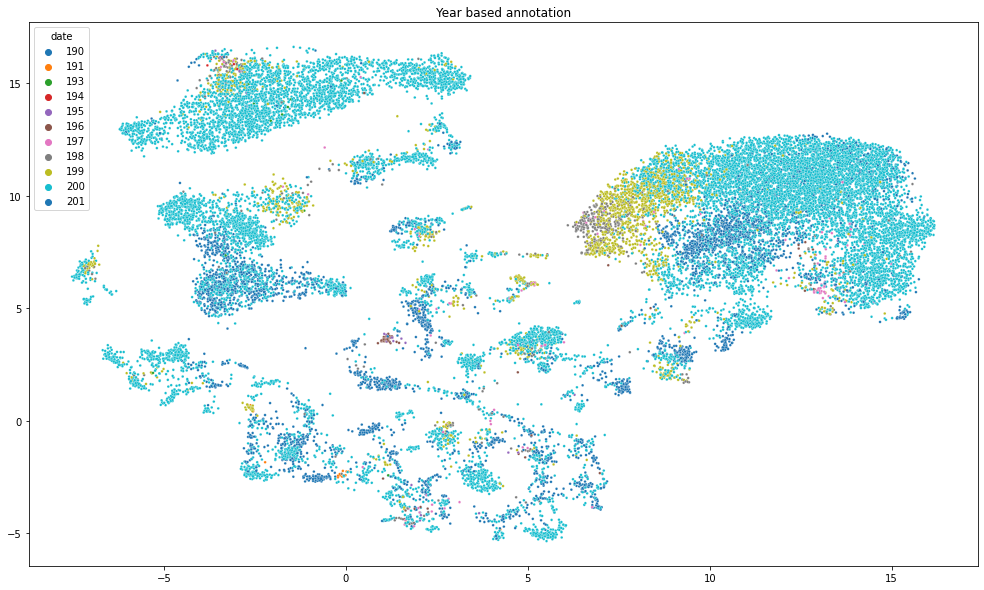

In [ ]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.set_title('Year based annotation')
sns.scatterplot(umap_embeds_2d[:, 0], umap_embeds_2d[:, 1], hue=dat, s=7, palette='tab10')

# **Protein Host Prediction**

To compare the representations produced by each model, we build different classifiers that use these representations as input to classify the sequences into three possible hosts that are Human, Swine or Avian. 

# Classifiers

Since the data is imbalanced with most sequences coming from human hosts, we balance our
data using SMOTE (Synthetic Minority Oversampling Technique), where we do oversampling of the minority classes, SMOTE does this by synthesizing the samples along the class decision boundary. 

In [ ]:
# balance data with smote
from imblearn.over_sampling import SMOTE

X, y = vecs, df_test['host']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# X.shape, X_res.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(y_res[y_res=='Human']), len(y_res[y_res=='Avian']), len(y_res[y_res=='Swine'])

(17509, 17509, 17509)

After oversampling, we split the data randomly into train and test set, we used 30% of the data for testing the
model, and the rest for training.

**Logistic Regression**

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

clf = LogisticRegression(random_state=42).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
clf.score(X_test, y_test)

0.898724538359033

In [ ]:
# f1 score
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average='macro')

0.8986505310533811

In [ ]:
# auc

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo')

0.9653000335523414

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
clf.score(X_test, y_test)

0.8336188844469826

In [ ]:
# f1 score
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average='macro')

0.815773982088456

In [ ]:
# auc

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo')

0.9329001017594977

**Support Vector Machine**

In [ ]:

from sklearn.svm import LinearSVC
# from sklearn.preprocessing import StandardScaler

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [ ]:
clf.score(X_test, y_test)

0.8900945491465194

In [ ]:
# f1 score
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average='macro')

0.8898773295549796

### Visualization with balancing

In [ ]:
embeds = TSNE(n_components=2, n_iter=3000).fit_transform(X_res)

In [ ]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.set_title('Host based annotation')
sns.scatterplot(embeds[:,0], embeds[:, 1], hue=y_res, s=7)

In [ ]:
reducer = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.5, random_state=42)

In [ ]:
umap_embeds_2d = reducer.fit_transform(X_res)

In [ ]:
fig, ax = plt.subplots(figsize=(17, 10))
sns.scatterplot(umap_embeds_2d[:, 0], umap_embeds_2d[:, 1], hue=y_res, s=7)